# Notebook 7 Supplementary A: Demonstration of how Gradient Boosting Method (GBM) works for Regression.

Created by Christopher Monterola

A step-by-step process demonstrating how GBM combines gradient descent with weak decision tree learners in building one of the winningest algorithm in machine learning.

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt


# Illustration 1. Regression using Weight data

Let's start by using a very simple example, predicting weight based on gender, age, height.  

In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data_dir = '/content/drive/MyDrive/Teaching/ML1_MSDS2022/Notebook 7/'

In [4]:
df_weight = pd.read_excel(data_dir +'weight_data.xlsx', sheet_name="Sheet1")
dummy=df_weight
df_weight

,Height,Gender,Age,Weight
0,1.6,Male,13,70
1,1.7,Male,43,79
2,1.4,Male,10,36
3,1.5,Female,35,65
4,1.4,Female,27,60


Let's set the *Weight* to be the target variable and limit the features to *Height*, *Gender* and *Age*.

In [5]:
df_features=dummy.drop('Weight', axis=1)
len(df_features)
df_features.head()

,Height,Gender,Age
0,1.6,Male,13
1,1.7,Male,43
2,1.4,Male,10
3,1.5,Female,35
4,1.4,Female,27


Encode *Gender* to be 1 for *Male* and 0 for *Female*.

In [6]:
Gender_mapping = {
'Male': 1,
'Female': 0}
df_features['Gender'] = df_features['Gender'].map(Gender_mapping)
df_features

,Height,Gender,Age
0,1.6,1,13
1,1.7,1,43
2,1.4,1,10
3,1.5,0,35
4,1.4,0,27


In [7]:
df_features,

(   Height  Gender  Age
 0     1.6       1   13
 1     1.7       1   43
 2     1.4       1   10
 3     1.5       0   35
 4     1.4       0   27,)

In [8]:
df_features.columns

Index(['Height', 'Gender', 'Age'], dtype='object')

In [9]:
dummy['Weight']

0    70
1    79
2    36
3    65
4    60
Name: Weight, dtype: int64

# Step 1: Make the first approximation of predicted weight by minimizing the cost function C.

The Cost function $C$ is given by: $C =\sum_i \frac{1}{2} (y_i- y_{pred_i})^2$

Solving for $y_{pred_i}$ that will minimize $C$, we have : $\frac{\partial C}{\partial y_{pred_i}}= \frac{1}{2} \sum_i \frac{\partial (y_i- y_{pred_i})^2}{\partial y_{pred_i}} =0$   

To solve the problem initially, let's assume $\gamma = y_{pred_i}=$ constant, hence, $\gamma = <y_i>$. Therefore, the first approximation of gradient method for the predicted weight for all the cases is just the average of the $Weight$ of all samples. 


In [10]:
Prediction_0= 5*[np.mean(dummy['Weight'])]
Prediction_0

[62.0, 62.0, 62.0, 62.0, 62.0]

In [11]:
dummy = dummy.assign(Prediction_0 = Prediction_0 )
dummy

,Height,Gender,Age,Weight,Prediction_0
0,1.6,Male,13,70,62.0
1,1.7,Male,43,79,62.0
2,1.4,Male,10,36,62.0
3,1.5,Female,35,65,62.0
4,1.4,Female,27,60,62.0


Calculate the residual by calculating the gradient $\Delta_i$ (hence, the Gradient term in the G of GBM) with respect to the predicted value : $\Delta_i= \frac{\partial C}{\partial y_{pred_i}}= \frac{1}{2} \sum_i \frac{\partial (y_i- y_{pred_i})^2}{\partial y_{pred_i}}$

In [12]:
Residual = dummy['Weight'] - np.mean(dummy['Weight'])
Residual

0     8.0
1    17.0
2   -26.0
3     3.0
4    -2.0
Name: Weight, dtype: float64

In [13]:
dummy = dummy.assign(Residual1 = Residual)
dummy

,Height,Gender,Age,Weight,Prediction_0,Residual1
0,1.6,Male,13,70,62.0,8.0
1,1.7,Male,43,79,62.0,17.0
2,1.4,Male,10,36,62.0,-26.0
3,1.5,Female,35,65,62.0,3.0
4,1.4,Female,27,60,62.0,-2.0


# Step 2: Use decision tree in predicting the *pseudo-residual* of the predicted weight.

In [14]:
from sklearn.tree import DecisionTreeRegressor

dec_tree = DecisionTreeRegressor(max_depth=3, random_state=0)
dec_tree.fit(df_features, dummy['Residual1'])

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=3,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=0, splitter='best')

In [15]:
from sklearn.tree import export_graphviz

export_graphviz(dec_tree, out_file="mytree.dot", feature_names=df_features.columns, filled=True)

In [16]:
dummy = dummy.assign(Residual1 = Residual)
dummy

,Height,Gender,Age,Weight,Prediction_0,Residual1
0,1.6,Male,13,70,62.0,8.0
1,1.7,Male,43,79,62.0,17.0
2,1.4,Male,10,36,62.0,-26.0
3,1.5,Female,35,65,62.0,3.0
4,1.4,Female,27,60,62.0,-2.0


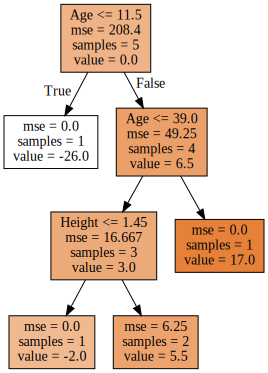

In [17]:
import graphviz
with open("mytree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

In [18]:
dummy = dummy.assign(Pseudo_Residual1 = [5.5, 17, -26, 5.5,-2])
dummy

,Height,Gender,Age,Weight,Prediction_0,Residual1,Pseudo_Residual1
0,1.6,Male,13,70,62.0,8.0,5.5
1,1.7,Male,43,79,62.0,17.0,17.0
2,1.4,Male,10,36,62.0,-26.0,-26.0
3,1.5,Female,35,65,62.0,3.0,5.5
4,1.4,Female,27,60,62.0,-2.0,-2.0


# Step 3: Use the *pseudo-residual* to update the predicted weight.

$y_{pred_i}^t = y_{pred_i}^{t-1} +$ (Learning_Rate * Pseudo_Residual1_i). Let's assume the *Learning_Rate* = 0.2. 

In [19]:
dummy = dummy.assign(Prediction_1 = dummy['Prediction_0'] + 0.2*dummy['Pseudo_Residual1'])
dummy

,Height,Gender,Age,Weight,Prediction_0,Residual1,Pseudo_Residual1,Prediction_1
0,1.6,Male,13,70,62.0,8.0,5.5,63.1
1,1.7,Male,43,79,62.0,17.0,17.0,65.4
2,1.4,Male,10,36,62.0,-26.0,-26.0,56.8
3,1.5,Female,35,65,62.0,3.0,5.5,63.1
4,1.4,Female,27,60,62.0,-2.0,-2.0,61.6


# Step 4: Repeat Steps 1-3

In [20]:
#Back to Step 1
dummy = dummy.assign(Residual2 = dummy['Weight']-dummy['Prediction_1']) #Gradient descent
dummy

,Height,Gender,Age,Weight,Prediction_0,Residual1,Pseudo_Residual1,Prediction_1,Residual2
0,1.6,Male,13,70,62.0,8.0,5.5,63.1,6.9
1,1.7,Male,43,79,62.0,17.0,17.0,65.4,13.6
2,1.4,Male,10,36,62.0,-26.0,-26.0,56.8,-20.8
3,1.5,Female,35,65,62.0,3.0,5.5,63.1,1.9
4,1.4,Female,27,60,62.0,-2.0,-2.0,61.6,-1.6


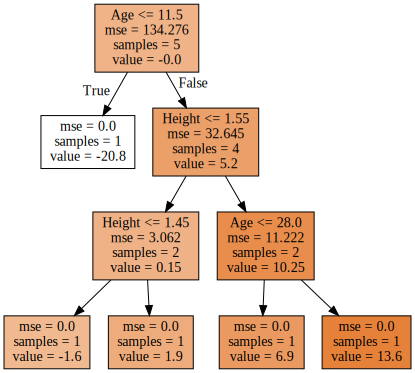

In [21]:
#Back to Step 2

from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_graphviz

dec_tree = DecisionTreeRegressor(max_depth=3, random_state=0)
dec_tree.fit(df_features, dummy['Residual2'])
export_graphviz(dec_tree, out_file="mytree.dot", feature_names=df_features.columns, filled=True)

import graphviz
with open("mytree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)


In [22]:
dummy = dummy.assign(Pseudo_Residual2 = [6.9, 13.6, -20.8, 1.9, -1.6])
dummy

,Height,Gender,Age,Weight,Prediction_0,Residual1,Pseudo_Residual1,Prediction_1,Residual2,Pseudo_Residual2
0,1.6,Male,13,70,62.0,8.0,5.5,63.1,6.9,6.9
1,1.7,Male,43,79,62.0,17.0,17.0,65.4,13.6,13.6
2,1.4,Male,10,36,62.0,-26.0,-26.0,56.8,-20.8,-20.8
3,1.5,Female,35,65,62.0,3.0,5.5,63.1,1.9,1.9
4,1.4,Female,27,60,62.0,-2.0,-2.0,61.6,-1.6,-1.6


In [23]:
#Back to Step 3
dummy = dummy.assign(Prediction_2 = dummy['Prediction_1'] + 0.2*dummy['Pseudo_Residual2'])
dummy

,Height,Gender,Age,Weight,Prediction_0,Residual1,Pseudo_Residual1,Prediction_1,Residual2,Pseudo_Residual2,Prediction_2
0,1.6,Male,13,70,62.0,8.0,5.5,63.1,6.9,6.9,64.48
1,1.7,Male,43,79,62.0,17.0,17.0,65.4,13.6,13.6,68.12
2,1.4,Male,10,36,62.0,-26.0,-26.0,56.8,-20.8,-20.8,52.64
3,1.5,Female,35,65,62.0,3.0,5.5,63.1,1.9,1.9,63.48
4,1.4,Female,27,60,62.0,-2.0,-2.0,61.6,-1.6,-1.6,61.28


In [24]:
#Back to step 1

dummy = dummy.assign(Residual3 = dummy['Weight']-dummy['Prediction_2']) #Gradient descent
dummy

,Height,Gender,Age,Weight,Prediction_0,Residual1,Pseudo_Residual1,Prediction_1,Residual2,Pseudo_Residual2,Prediction_2,Residual3
0,1.6,Male,13,70,62.0,8.0,5.5,63.1,6.9,6.9,64.48,5.52
1,1.7,Male,43,79,62.0,17.0,17.0,65.4,13.6,13.6,68.12,10.88
2,1.4,Male,10,36,62.0,-26.0,-26.0,56.8,-20.8,-20.8,52.64,-16.64
3,1.5,Female,35,65,62.0,3.0,5.5,63.1,1.9,1.9,63.48,1.52
4,1.4,Female,27,60,62.0,-2.0,-2.0,61.6,-1.6,-1.6,61.28,-1.28


Let's look at the residuals (gradient) and note that it decreases every iteration.

In [25]:
ssq1 = np.sum(dummy['Residual1']**2) # Sum of squares of residuals
ssq2 = np.sum(dummy['Residual2']**2)
ssq3 = np.sum(dummy['Residual3']**2)

print(round(ssq1,2))
print(round(ssq2,2))
print(round(ssq3,2))


1042.0
671.38
429.68


# Conclusion

We have demonstrated here how the GBM works for a regression, the procedure for the classification is similar and the main difference is instead of averaging you use the $\log(odds)$ and make the forecast by updating the values using the sigmoid function. Again, below is a visual representation of how the error decreases as a function of iteration parametrized as *n_estimator* in GBM.

![algorithm-iterations width="5000px"](https://user-images.githubusercontent.com/25600601/112873342-185b7900-90f4-11eb-8292-a3aa8a5a2a9e.png)
